# Multiple Linear Regression Assignment
## Bike Sharing Case Study

#### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


#### Objective:

- Identify the variables affecting Bike sharing.

- To create a linear model that quantitatively relates Bike sharing with variables provided in dataset. 

- To know the accuracy of the model, i.e. how well these variables can predict Bike Sharing prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read Bike dataset


In [61]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
bikes = pd.read_csv("day.csv")

In [64]:
# Check the head of the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the shared Bikes dataframe

In [65]:
bikes.shape

(730, 16)

In [66]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no NULL values in data set.

In [67]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [68]:
# Encoding/mapping the season,month, Weekday, weathersit columns

bikes.season = bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes.mnth = bikes.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikes.weekday=bikes.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bikes.weathersit=bikes.weathersit.map({1:'Clear',2:'Misty',3:'Light_snow',4:'Heavy_rain'})


In [69]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [70]:
# dropping the unwanted columns
# instant is the index for the row, dteday has date which can be covered by year and month column,
# casual and registered are actually the breakup by category for cnt column.

bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [71]:
# Separating Categorical and Continuous Numerical Variables
categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
continuous = ['temp', 'atemp', 'hum', 'windspeed','cnt']

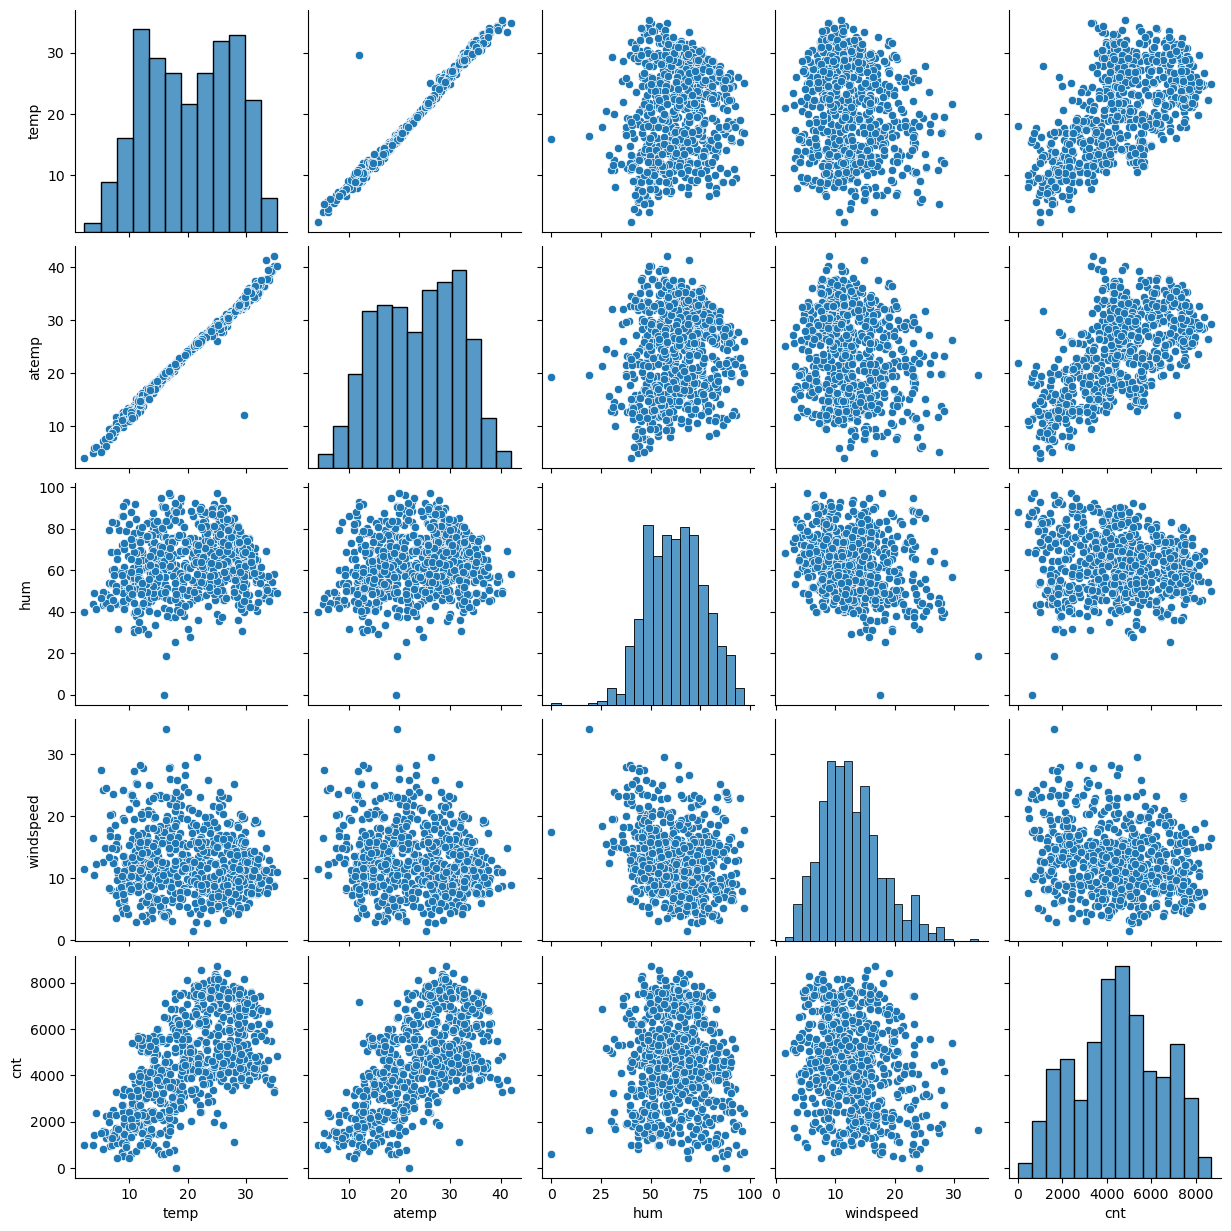

In [72]:
sns.pairplot(bikes[continuous])
plt.show()

#### Observations:
- Seems temp and atemp has strong correlation.
- Dependent variable count seems have linearity with temp/atemp

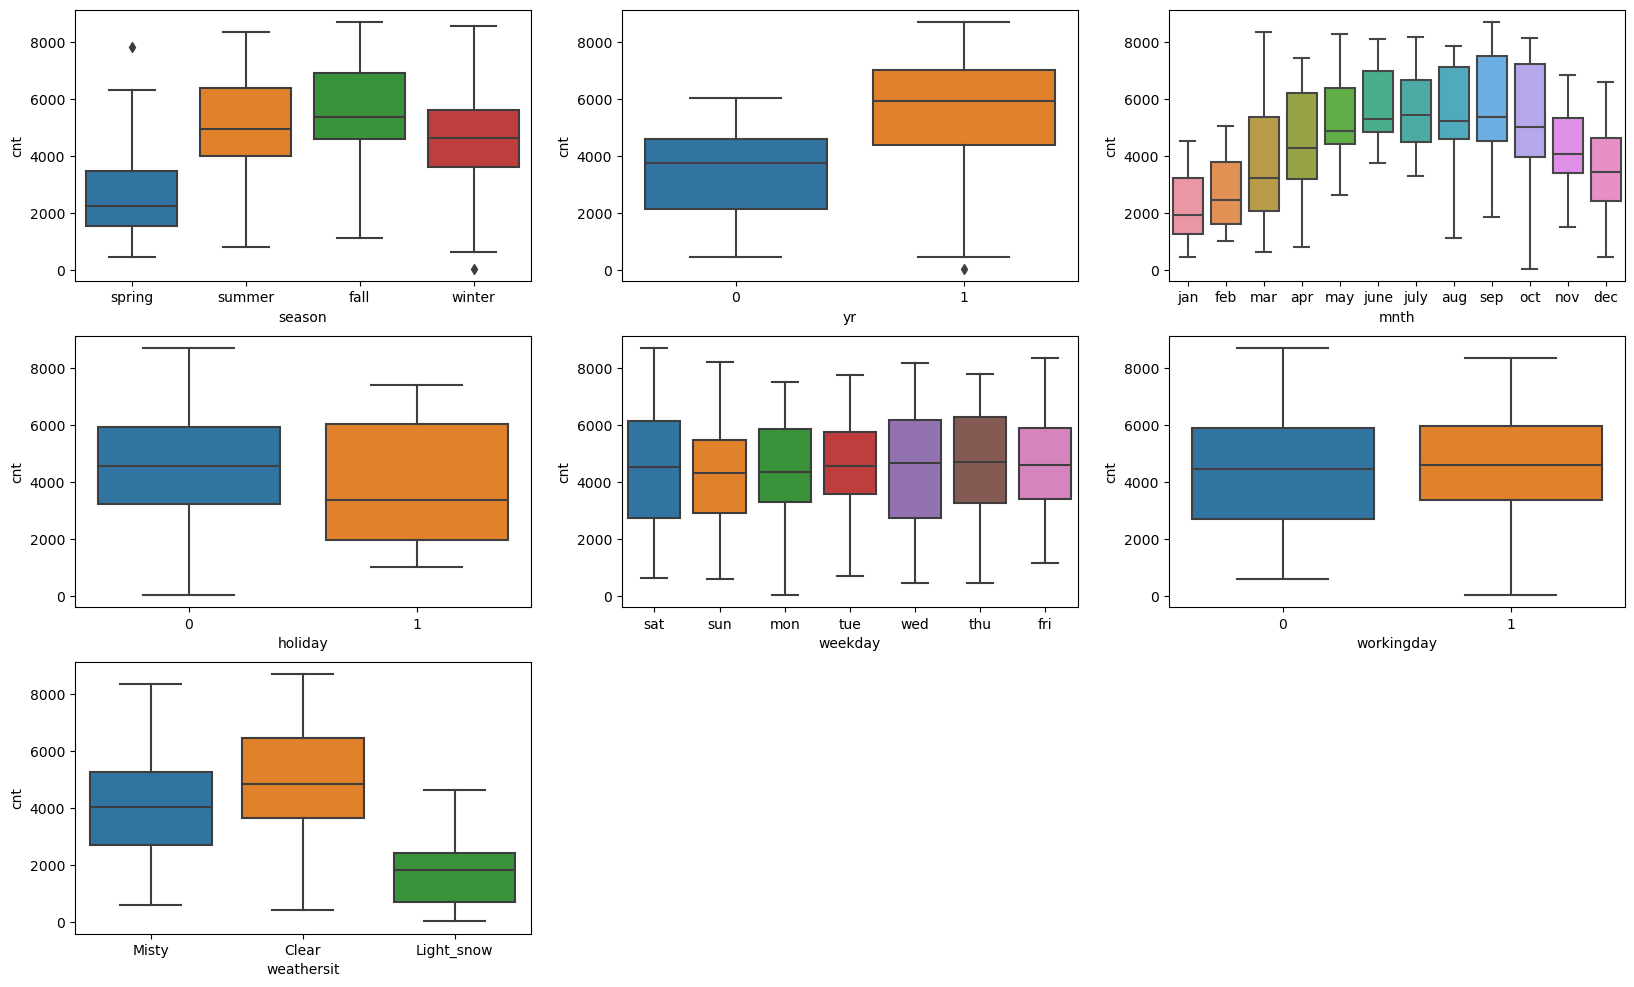

In [73]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

#### Observations:
- Summer and fall seems show raise in cnt, which also depicted in month plot.
- There is good improvement in second year 2019 compared to 2018.
-  Clear Weather is also showing impact on bike count.

<Axes: >

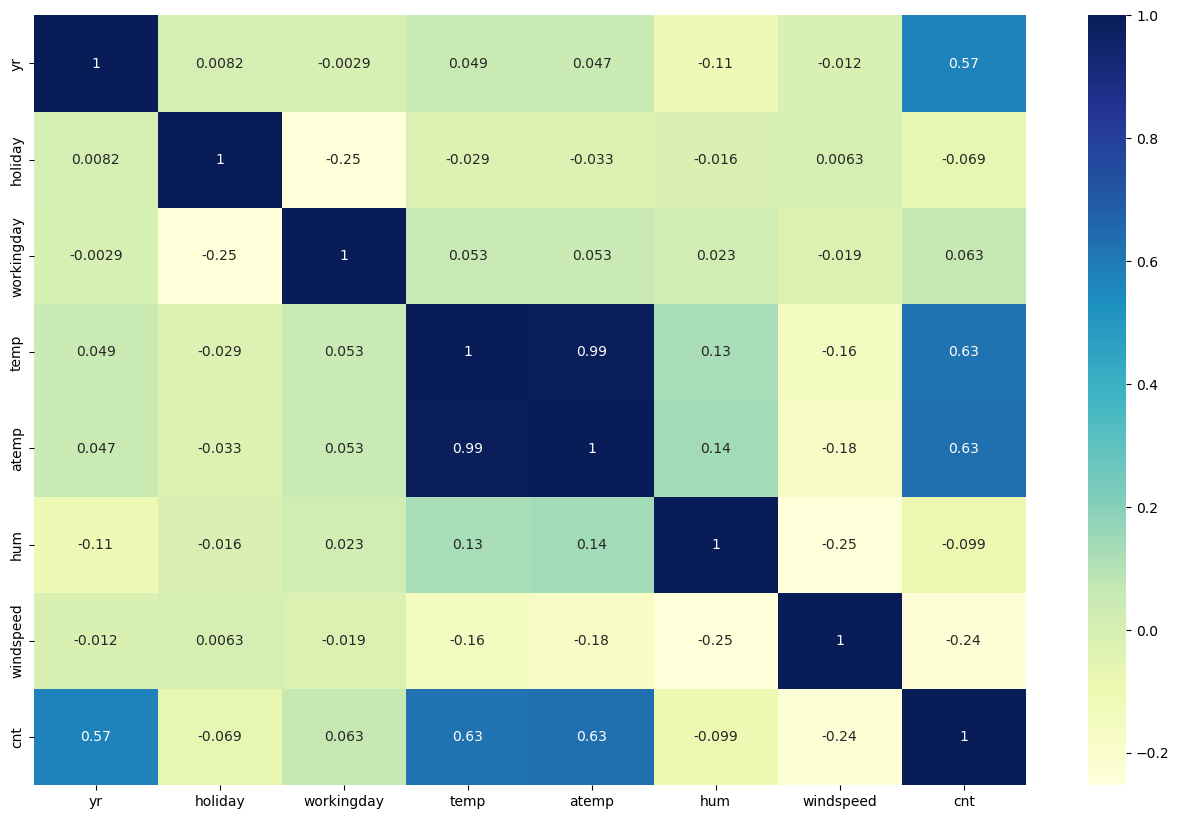

In [74]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bikes.corr(), annot = True, cmap="YlGnBu")


In [75]:
# dropping temp column, temp and atemp have collinearlity so considering one should be good enough 
# atemp seems right variable as it is derived based on tempature feeling.

bikes.drop(['temp'],axis=1,inplace=True)

## Step 3: Data Preparation

In [76]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months=pd.get_dummies(bikes.mnth,drop_first=True)
weekdays=pd.get_dummies(bikes.weekday,drop_first=True)
weathersit=pd.get_dummies(bikes.weathersit,drop_first=True)
seasons=pd.get_dummies(bikes.season,drop_first=True)

In [77]:
# Merging  the dataframe, with the dummy variable dataset. 

bikes = pd.concat([bikes,months,weekdays,weathersit,seasons],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,sat,sun,thu,tue,wed,Light_snow,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,18.18125,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,17.68695,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [78]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  july        730 non-null    uint8  
 16  june        730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

In [79]:
# dropping columns for which we have created dummy variable out of it.

bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   aug         730 non-null    uint8  
 8   dec         730 non-null    uint8  
 9   feb         730 non-null    uint8  
 10  jan         730 non-null    uint8  
 11  july        730 non-null    uint8  
 12  june        730 non-null    uint8  
 13  mar         730 non-null    uint8  
 14  may         730 non-null    uint8  
 15  nov         730 non-null    uint8  
 16  oct         730 non-null    uint8  
 17  sep         730 non-null    uint8  
 18  mon         730 non-null    uint8  
 19  sat         730 non-null    u

## Step 4: Splitting the Data into Training and Testing Sets

First basic step for regression is performing a train-test split.

In [80]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

Using MinMax scaling, lets scale the dateset

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [82]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
vars = ['atemp', 'hum', 'windspeed','cnt']

df_train[vars] = scaler.fit_transform(df_train[vars])

In [83]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snow,Misty,spring,summer,winter
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [84]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snow,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


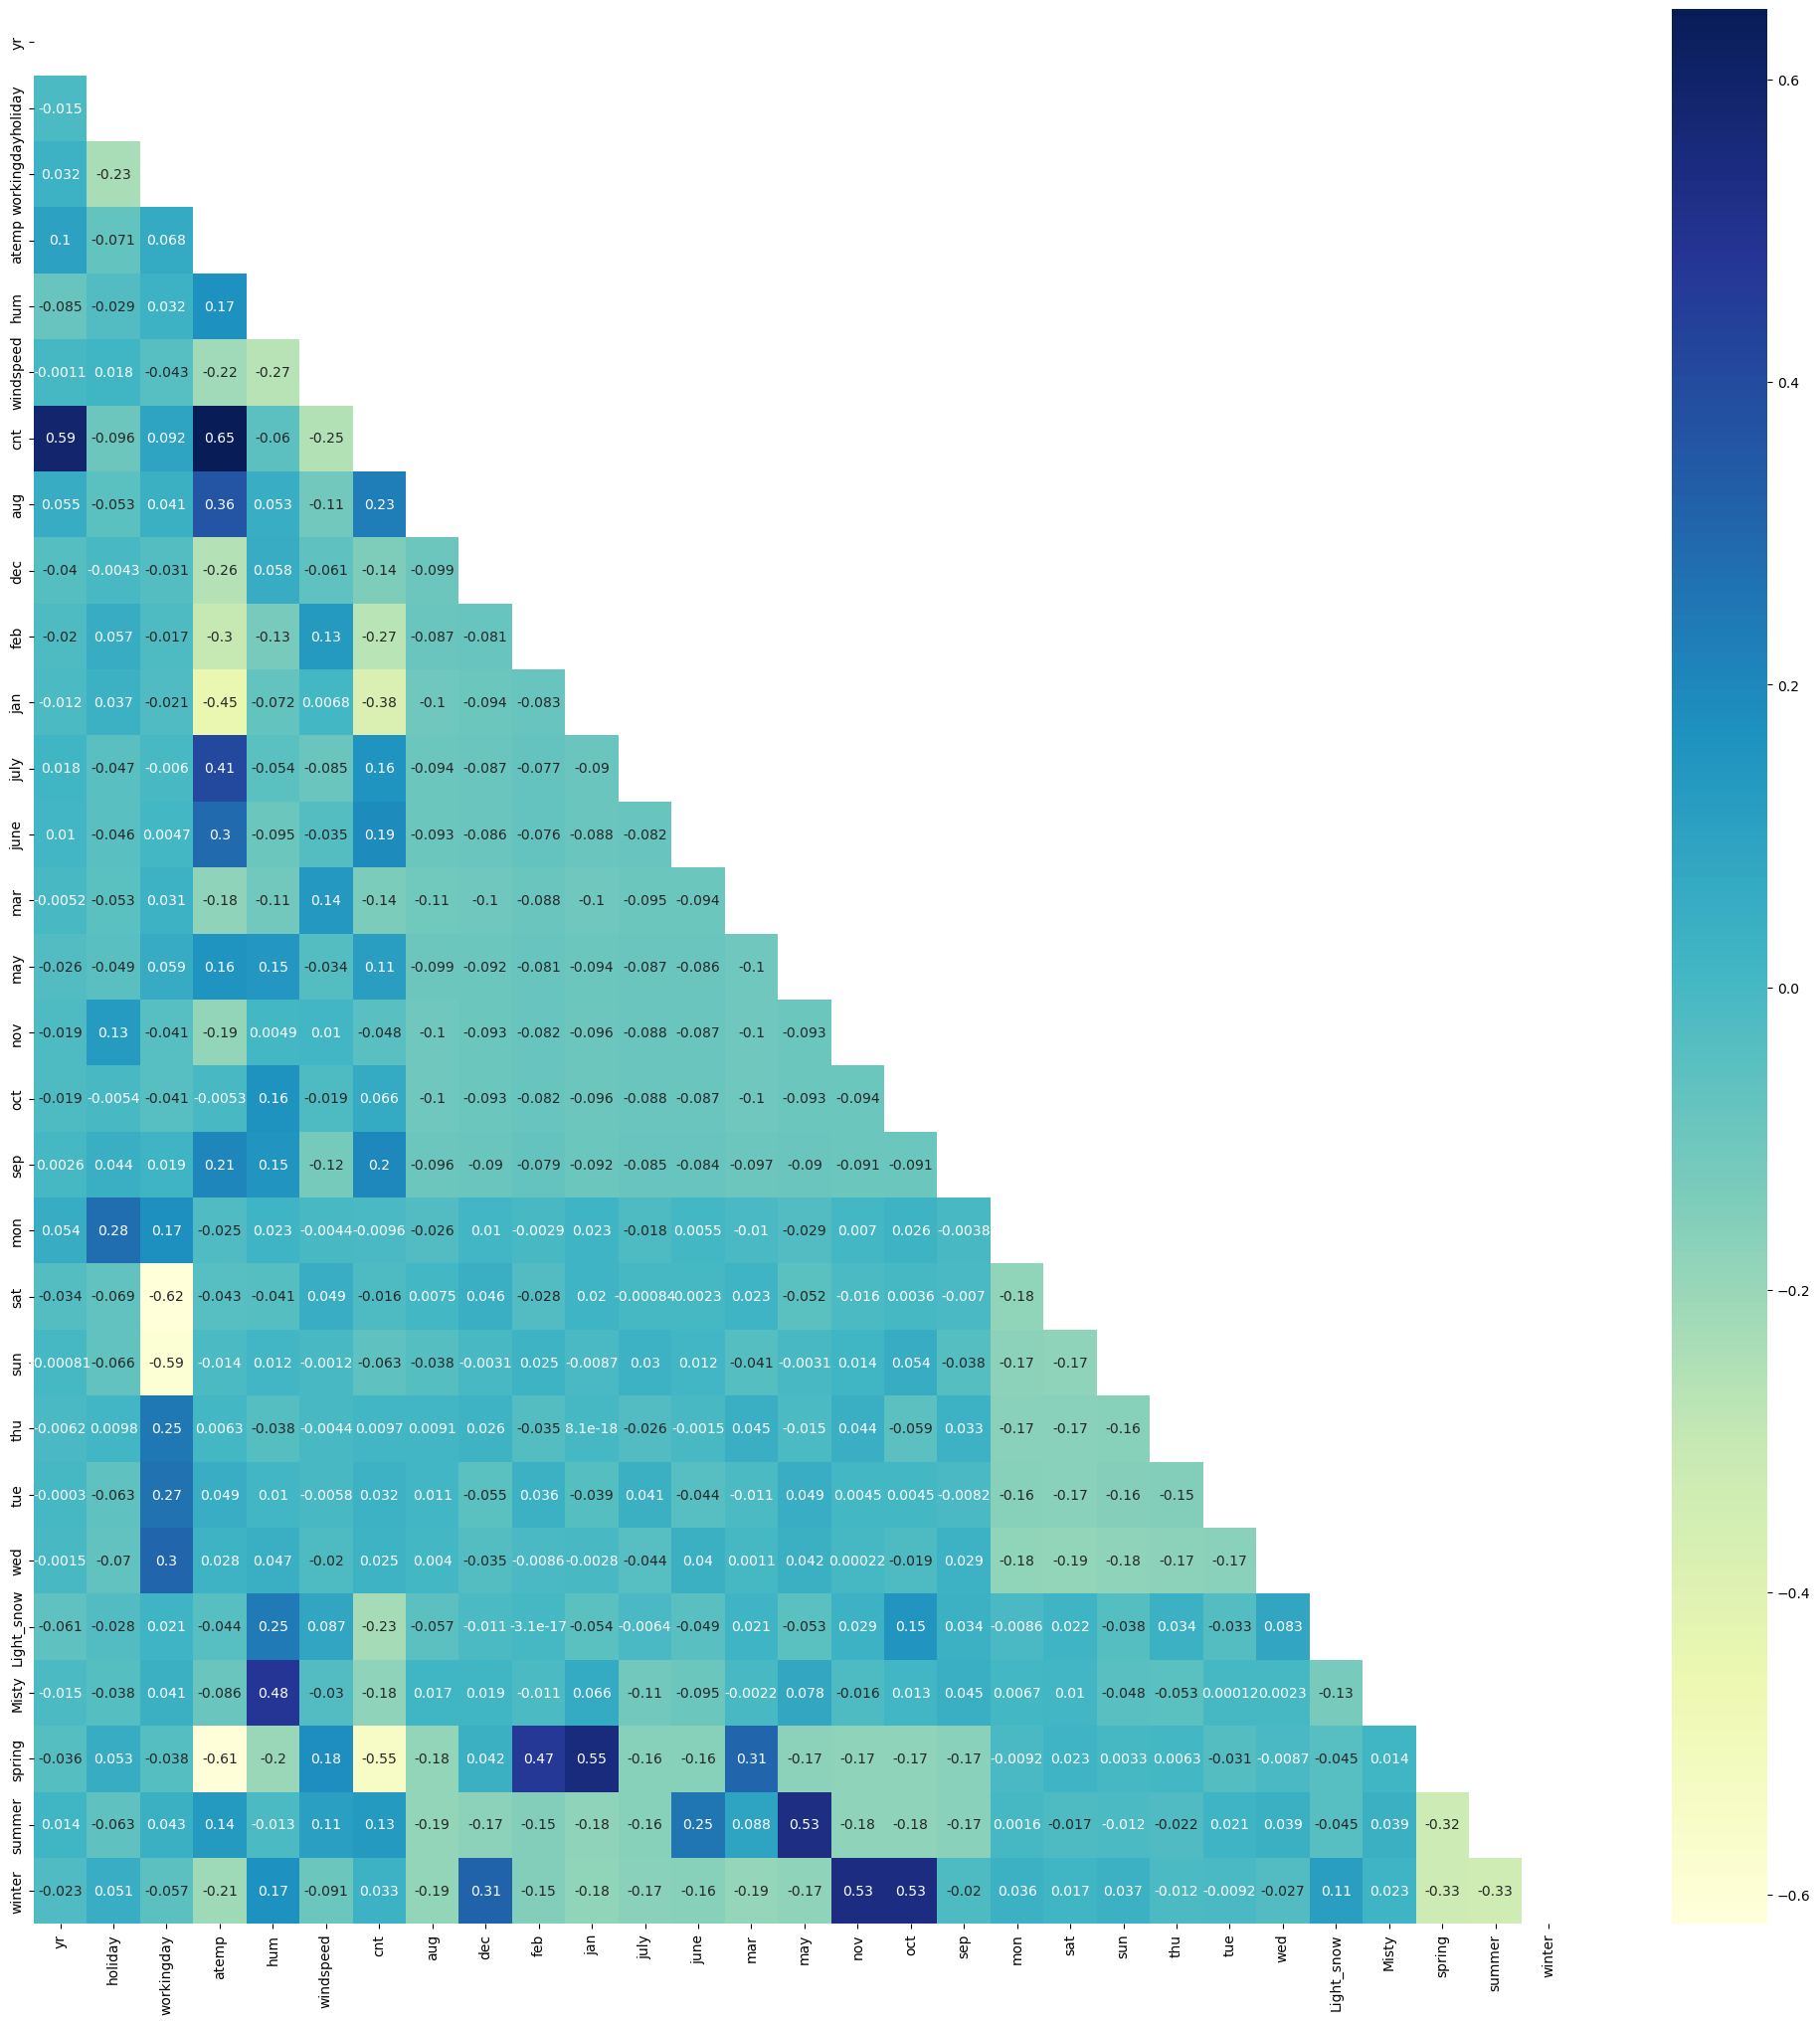

In [85]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

### Obeservations 

Bikes count seems linearity with year and temp

## Step 5: Building a linear model



In [86]:
y_train = df_train.pop('cnt')
X_train = df_train

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [88]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [89]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 8),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 13),
 ('Light_snow', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1)]

In [90]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'sun', 'Light_snow', 'Misty', 'spring', 'winter'],
      dtype='object')

In [91]:
X_train.columns[~rfe.support_]


Index(['aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon', 'thu',
       'tue', 'wed', 'summer'],
      dtype='object')

In [92]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [94]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [95]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,41.67
9,sat,10.16
10,sun,9.84
3,atemp,3.11
13,spring,2.66
1,holiday,2.57
4,hum,1.91
14,winter,1.75
12,Misty,1.57
6,jan,1.56


#### Drop high VIF features

In [96]:
X_train_rfe.drop(['workingday'], axis = 1,inplace=True)



In [97]:
import statsmodels.api as sm 

In [98]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.66e-188
Time:                        09:46:08   Log-Likelihood:                 510.32
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3500      0.031     11.154      0.0

In [99]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,24.02
2,atemp,15.97
4,windspeed,4.00
12,spring,2.86
11,Misty,2.26
0,yr,2.06
13,winter,2.06
5,jan,1.67
6,july,1.40
8,sat,1.23


In [100]:
X_train_rfe.drop(['hum'], axis = 1,inplace=True)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,atemp,4.66
3,windspeed,3.96
11,spring,2.26
0,yr,2.06
4,jan,1.60
10,Misty,1.53
12,winter,1.43
5,july,1.35
7,sat,1.23
8,sun,1.21


In [43]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.51e-186
Time:                        09:34:16   Log-Likelihood:                 502.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2744      0.025     11.115      0.0

In [101]:
# We can drop Saturday variable as it has high p-value
X_train_rfe.drop(['sat'], axis = 1,inplace=True)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,atemp,4.60
3,windspeed,3.92
10,spring,2.25
0,yr,2.06
4,jan,1.60
9,Misty,1.53
11,winter,1.42
5,july,1.35
6,sep,1.20
7,sun,1.18


In [123]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          2.12e-187
Time:                        10:51:39   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     498   BIC:                            -923.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2620      0.024     10.921      0.0

In [103]:
# We can drop Saturday variable as it has high p-value
X_train_rfe.drop(['jan'], axis = 1,inplace=True)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,atemp,4.58
3,windspeed,3.91
0,yr,2.05
9,spring,1.65
8,Misty,1.52
10,winter,1.42
4,july,1.35
5,sep,1.20
6,sun,1.18
7,Light_snow,1.08


In [124]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.5
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          2.12e-187
Time:                        10:51:48   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     498   BIC:                            -923.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2620      0.024     10.921      0.0

#### Lets cosider the above model, as it seems to have very low multicolinearity between the features and the p-values for all the features seems to be significant.

In [105]:
# Checking the parameters and their coefficient values
lr_4.params

const         0.261986
yr            0.234998
holiday      -0.102816
atemp         0.463225
windspeed    -0.125373
july         -0.065714
sep           0.058742
sun          -0.048395
Light_snow   -0.287197
Misty        -0.083654
spring       -0.116698
winter        0.041178
dtype: float64

## Step 6: Residual Analysis of the train data


In [106]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

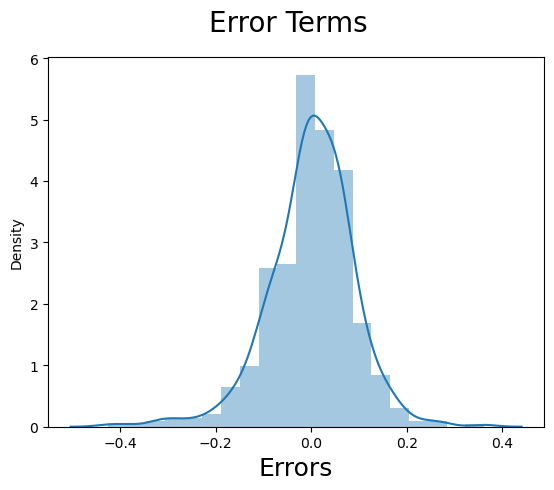

In [107]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)    

#### Error terms are normally distributed.

#### Check for Homoscedasticity

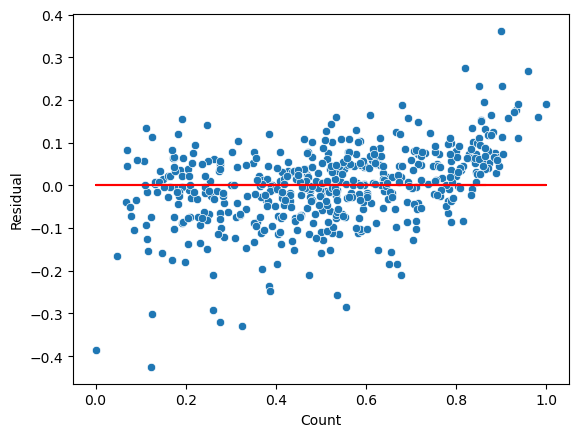

In [122]:
y_train_pred = lr_4.predict(X_train_lm_4)
residual = y_train - y_train_pred

sns.scatterplot(x=y_train, y=residual)

plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

##### No  pattern observed from above plot for residuals 

## Step 7: Making Predictions Using the Final Model

In [108]:
# Applying scaling on the test dataset

num_vars = ['atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snow,Misty,spring,summer,winter
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [109]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snow,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,0.100457,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,0.301297,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
y_test = df_test.pop('cnt')
X_test = df_test

In [111]:
col1 = X_train_rfe.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)

In [112]:
y_pred = lr_4.predict(X_test_lm_4)

In [113]:
from sklearn.metrics import r2_score

In [114]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8122

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

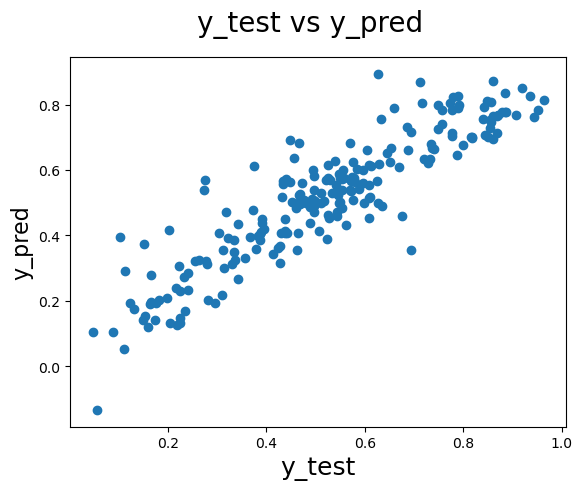

In [115]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [116]:
round(lr_4.params,4)

const         0.2620
yr            0.2350
holiday      -0.1028
atemp         0.4632
windspeed    -0.1254
july         -0.0657
sep           0.0587
sun          -0.0484
Light_snow   -0.2872
Misty        -0.0837
spring       -0.1167
winter        0.0412
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.2620 + 0.2350 \times  year - 0.1028  \times  holiday + 0.4632 \times atemp - 0.1254 \times windspeed - 0.0657 \times july + 0.0587 \times sep - 0.0484 \times sun - 0.2872 \times Light_snow - 0.0837 \times Misty - 0.1167 \times spring + 0.0412 \times winter $

In [117]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8022


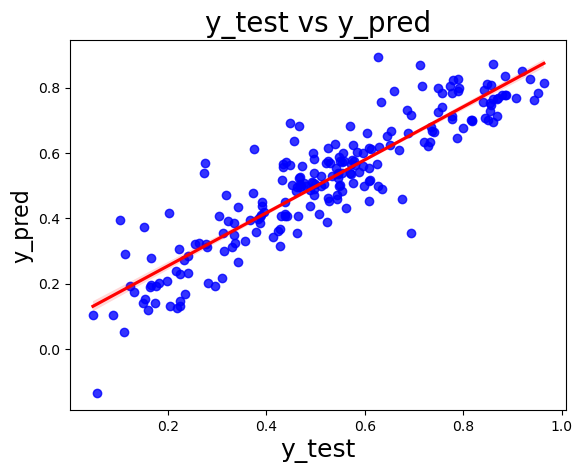

In [118]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.836
    - Test dataset R^2           : 0.8122
        
    - Train dataset Adjusted R^2 : 0.832    
    - Test dataset Adjusted R^2  : 0.8022

#### Demand of bikes depend on year, holiday, atemp, windspeed, july, sep, sun, Light_snow, Misty, spring and winter.